In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics

In [146]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# metadata 
print(auto_mpg.metadata) 
  
# variable information 
print(auto_mpg.variables) 


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

In [147]:
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [148]:
X.shape

(398, 7)

In [149]:
X.dtypes

displacement    float64
cylinders         int64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin            int64
dtype: object

In [150]:
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


**Exploratory Data Analysis**

In [151]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


In [152]:
X["horsepower"].value_counts()

horsepower
150.0    22
90.0     20
88.0     19
110.0    18
100.0    17
         ..
61.0      1
93.0      1
148.0     1
152.0     1
82.0      1
Name: count, Length: 93, dtype: int64

In [153]:
X.round(2)

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,140.0,4,86.0,2790,15.6,82,1
394,97.0,4,52.0,2130,24.6,82,2
395,135.0,4,84.0,2295,11.6,82,1
396,120.0,4,79.0,2625,18.6,82,1


In [154]:
X.describe()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,193.425879,5.454774,104.469388,2970.424623,15.568090,76.010050,1.572864
std,104.269838,1.701004,38.491160,846.841774,2.757689,3.697627,0.802055
min,68.000000,3.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,104.250000,4.000000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,148.500000,4.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,262.000000,8.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,455.000000,8.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [155]:
X.isnull().sum().sort_values(ascending=False)

horsepower      6
displacement    0
cylinders       0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [156]:
X["horsepower"].isnull().unique()
#X["horsepower"].values
X["horsepower"].fillna(0, inplace=True)

C:\Users\Ratne\AppData\Local\Temp\ipykernel_13432\4272292714.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X["horsepower"].fillna(0, inplace=True)
C:\Users\Ratne\AppData\Local\Temp\ipykernel_13432\4272292714.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["horsepower"].fillna(0, inplace=True)


In [157]:
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


In [158]:
y.value_counts()

mpg 
13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
26.4     1
25.8     1
25.1     1
24.3     1
46.6     1
Name: count, Length: 129, dtype: int64

array([[<Axes: title={'center': 'displacement'}>,
        <Axes: title={'center': 'cylinders'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'acceleration'}>,
        <Axes: title={'center': 'model_year'}>],
       [<Axes: title={'center': 'origin'}>, <Axes: >, <Axes: >]],
      dtype=object)

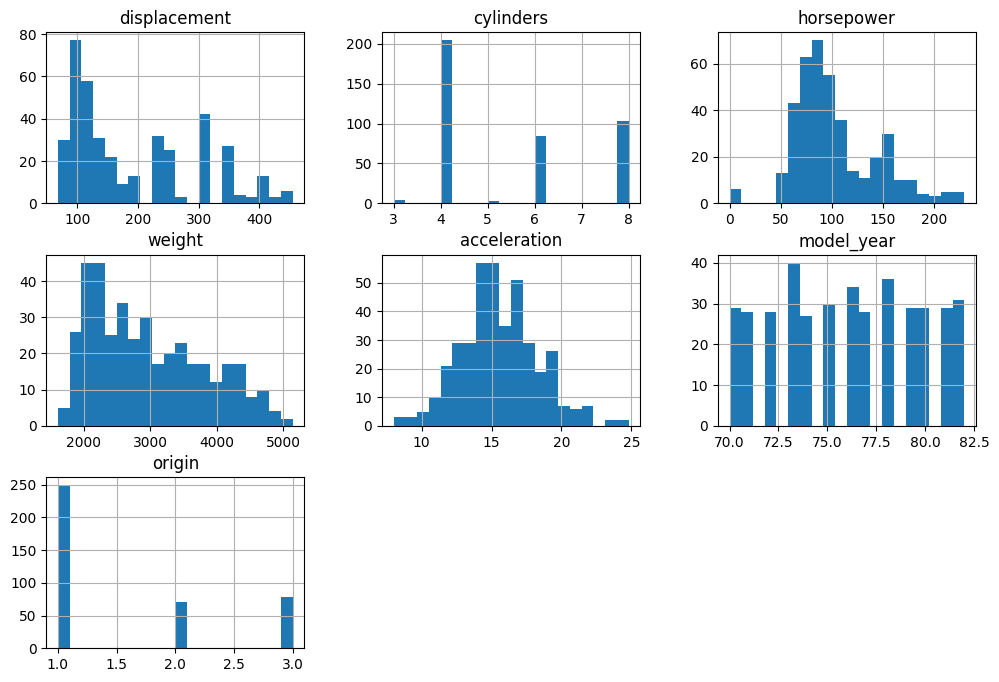

In [159]:
X.hist(figsize=(12,8),bins=20)


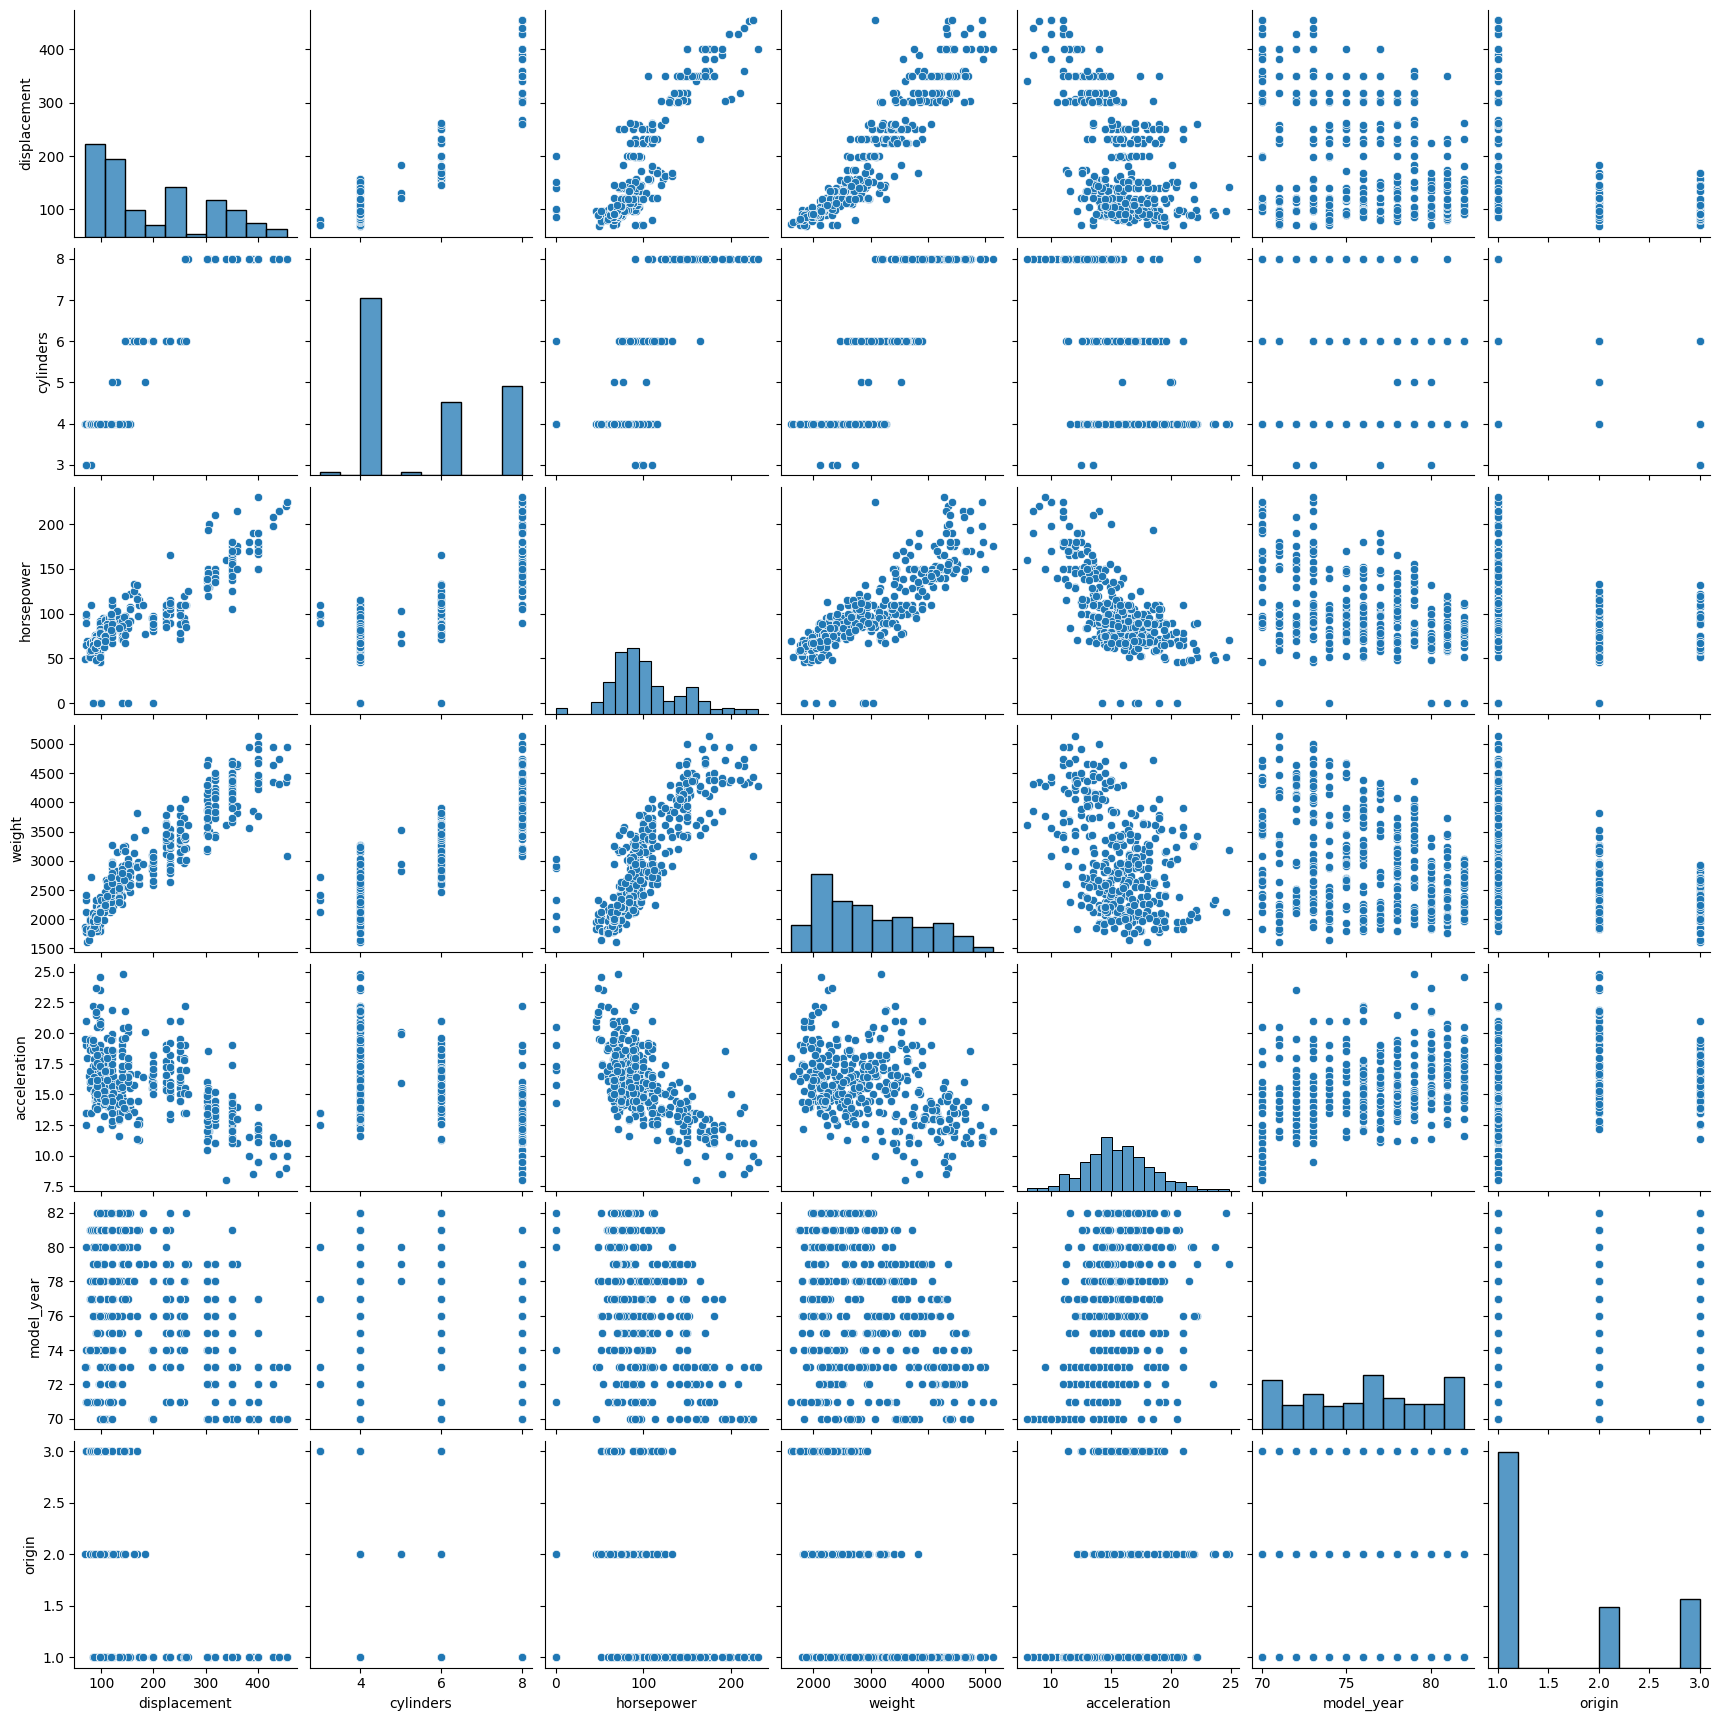

In [160]:
sns.pairplot(X)

In [161]:
#X['origin']=X.origin.map({1: 'US', 2: 'Asian',3:'European'})


In [162]:
X.iloc[:,:-1]

,displacement,cylinders,horsepower,weight,acceleration,model_year
0,307.0,8,130.0,3504,12.0,70
1,350.0,8,165.0,3693,11.5,70
2,318.0,8,150.0,3436,11.0,70
3,304.0,8,150.0,3433,12.0,70
4,302.0,8,140.0,3449,10.5,70
...,...,...,...,...,...,...
393,140.0,4,86.0,2790,15.6,82
394,97.0,4,52.0,2130,24.6,82
395,135.0,4,84.0,2295,11.6,82
396,120.0,4,79.0,2625,18.6,82


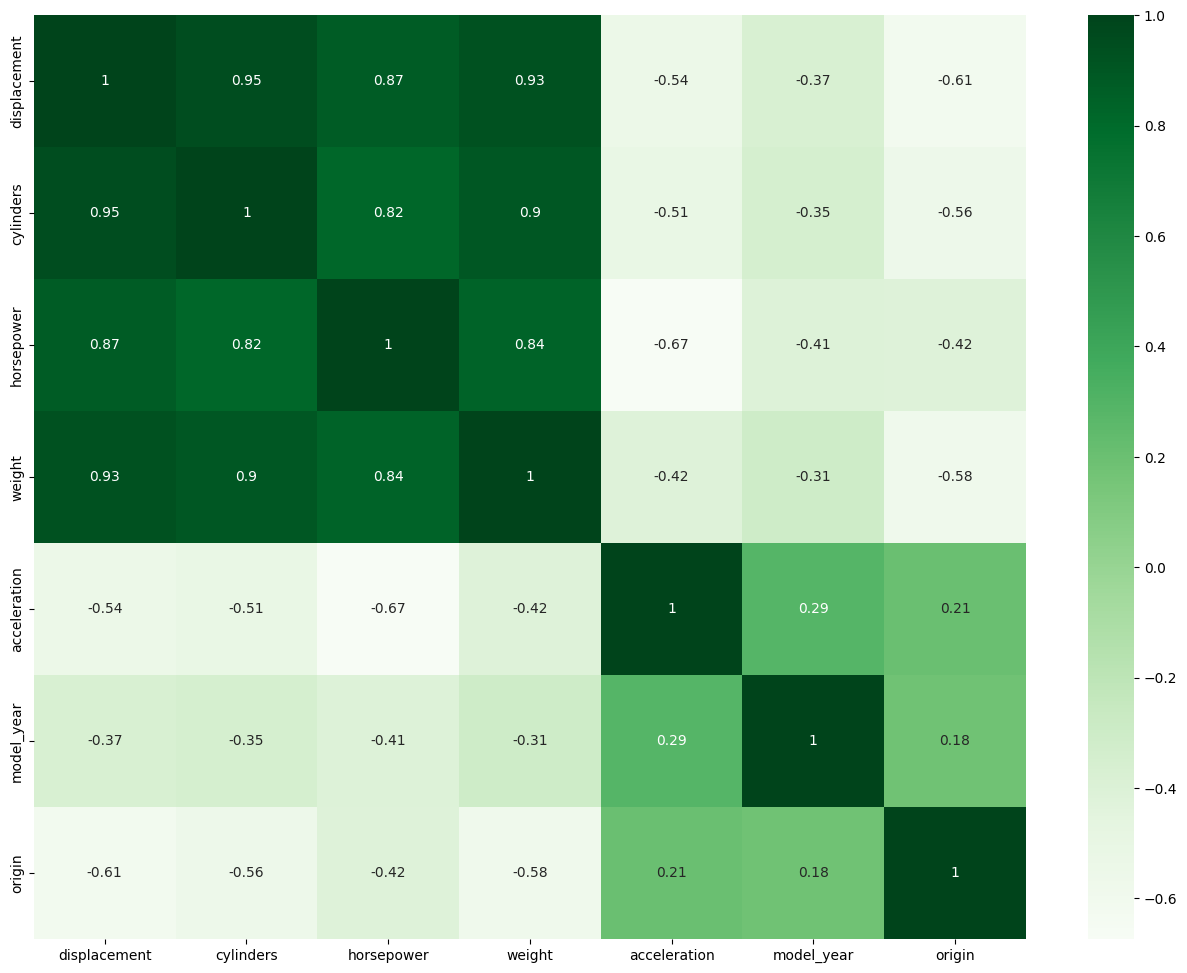

In [163]:
plt.figure(figsize = (16, 12))# Correlation
sns.heatmap(X.corr(), cmap = 'Greens', annot = True)#, fmt = '.2%')
plt.savefig('features_correlation.png')

**Regression Model**

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [165]:
X_train,X_test, y_train, y_test = train_test_split(X, y , test_size = 0.25, random_state=42)

**Linear Regression**

In [166]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred=linear_model.predict(X_test)

In [167]:
print('Training Score : ', linear_model.score(X_train, y_train))
print('Testing Score  : ', linear_model.score(X_test, y_test))
print('R2 Score : ', r2_score(y_test, linear_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, linear_model.predict(X_test)))
print("Mean Absolute Error : ", mean_absolute_error(y_test, linear_model.predict(X_test)))

Training Score :  0.8130378351809127
Testing Score  :  0.8416739935786939
R2 Score :  0.8416739935786939
MSE :  8.990307318840342
Mean Absolute Error :  2.330737531601003


**Decision Tree**

In [168]:
dtr_model = DecisionTreeRegressor(max_depth=5,random_state=42)
dtr_model.fit(X_train, y_train)
dtr_model.score(X_train, y_train)

0.9250278121455076

In [169]:
print('Training Score : ', dtr_model.score(X_train, y_train))
print('Testing Score  : ', dtr_model.score(X_test, y_test))
print('R2 Score : ', r2_score(y_test, dtr_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, dtr_model.predict(X_test)))
print("Mean Absolute Error : ", mean_absolute_error(y_test, dtr_model.predict(X_test)))

Training Score :  0.9250278121455076
Testing Score  :  0.8109436187401928
R2 Score :  0.8109436187401928
MSE :  10.735286050168362
Mean Absolute Error :  2.2760908146451246


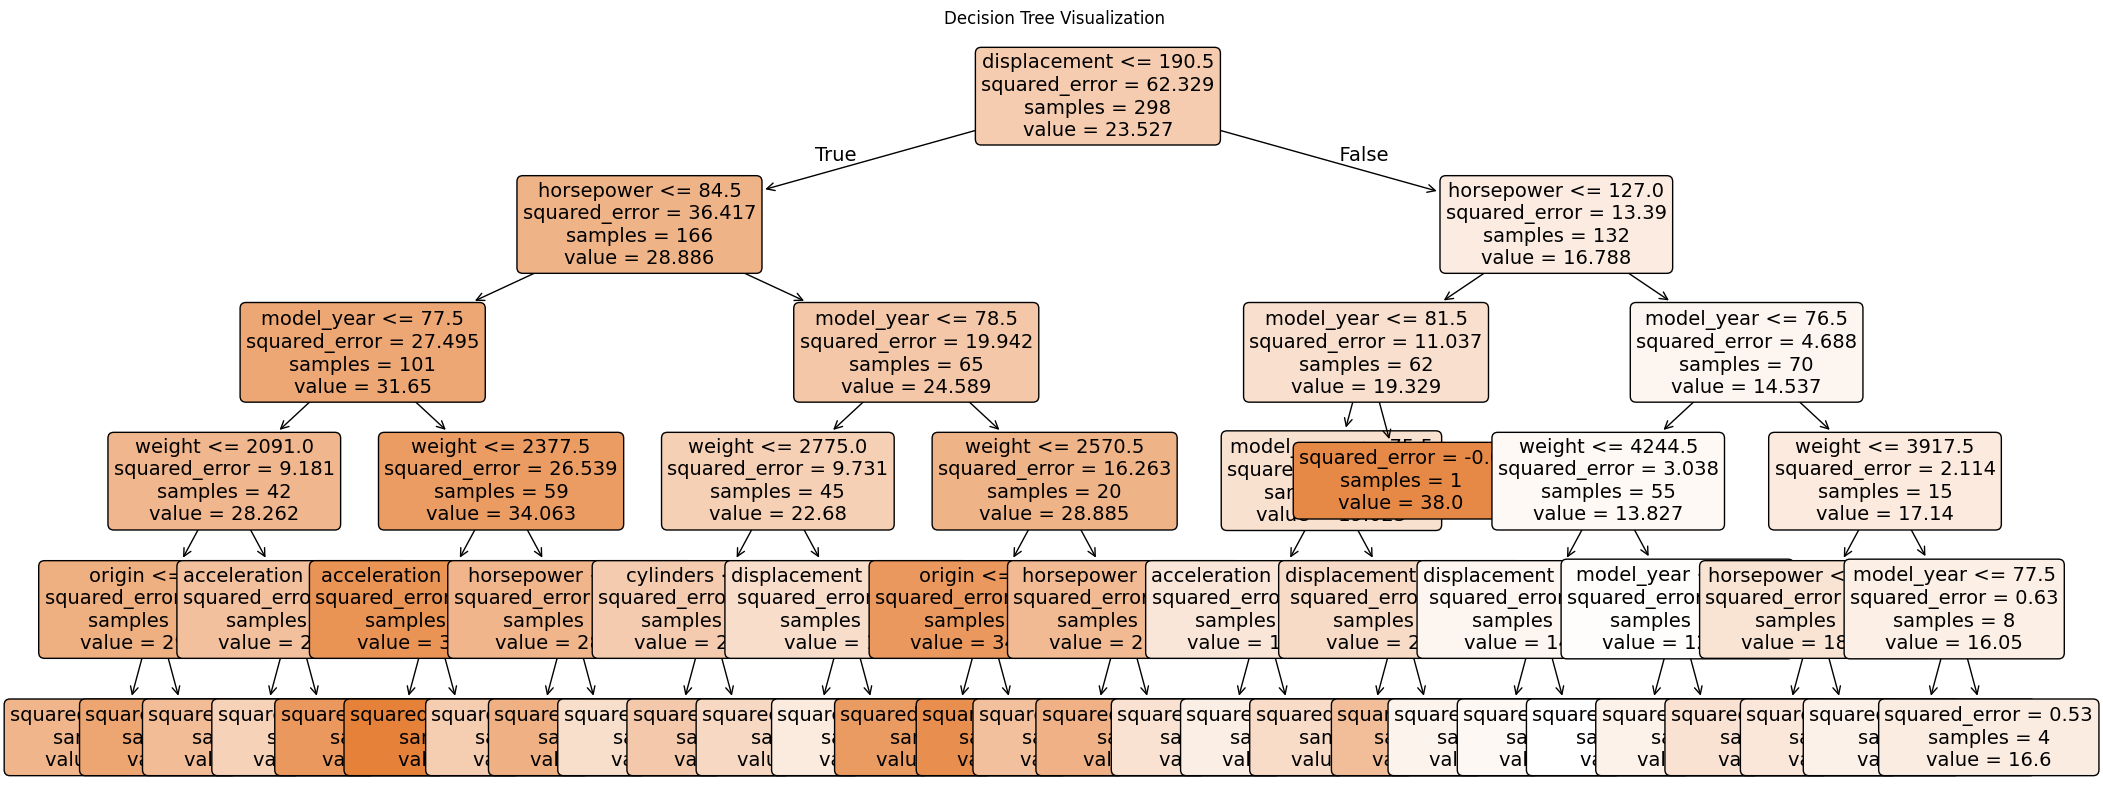

In [170]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
plt.figure(figsize=(25, 10))
plot_tree(dtr_model, feature_names=X.columns, filled=True, rounded=True,fontsize=14)
plt.title("Decision Tree Visualization")
plt.show()

**Random Forest**

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
rfr = RandomForestRegressor(max_depth = 5)
rfr.fit(X_train, y_train)
print('Training Score : ', rfr.score(X_train, y_train))
print('Testing Score  : ', rfr.score(X_test, y_test))
print('R2 Score : ', r2_score(y_test, rfr.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, rfr.predict(X_test)))

c:\Users\Ratne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training Score :  0.9693956866600119
Testing Score  :  0.9072289904368812
R2 Score :  0.9072289904368812
MSE :  4.98796726730614


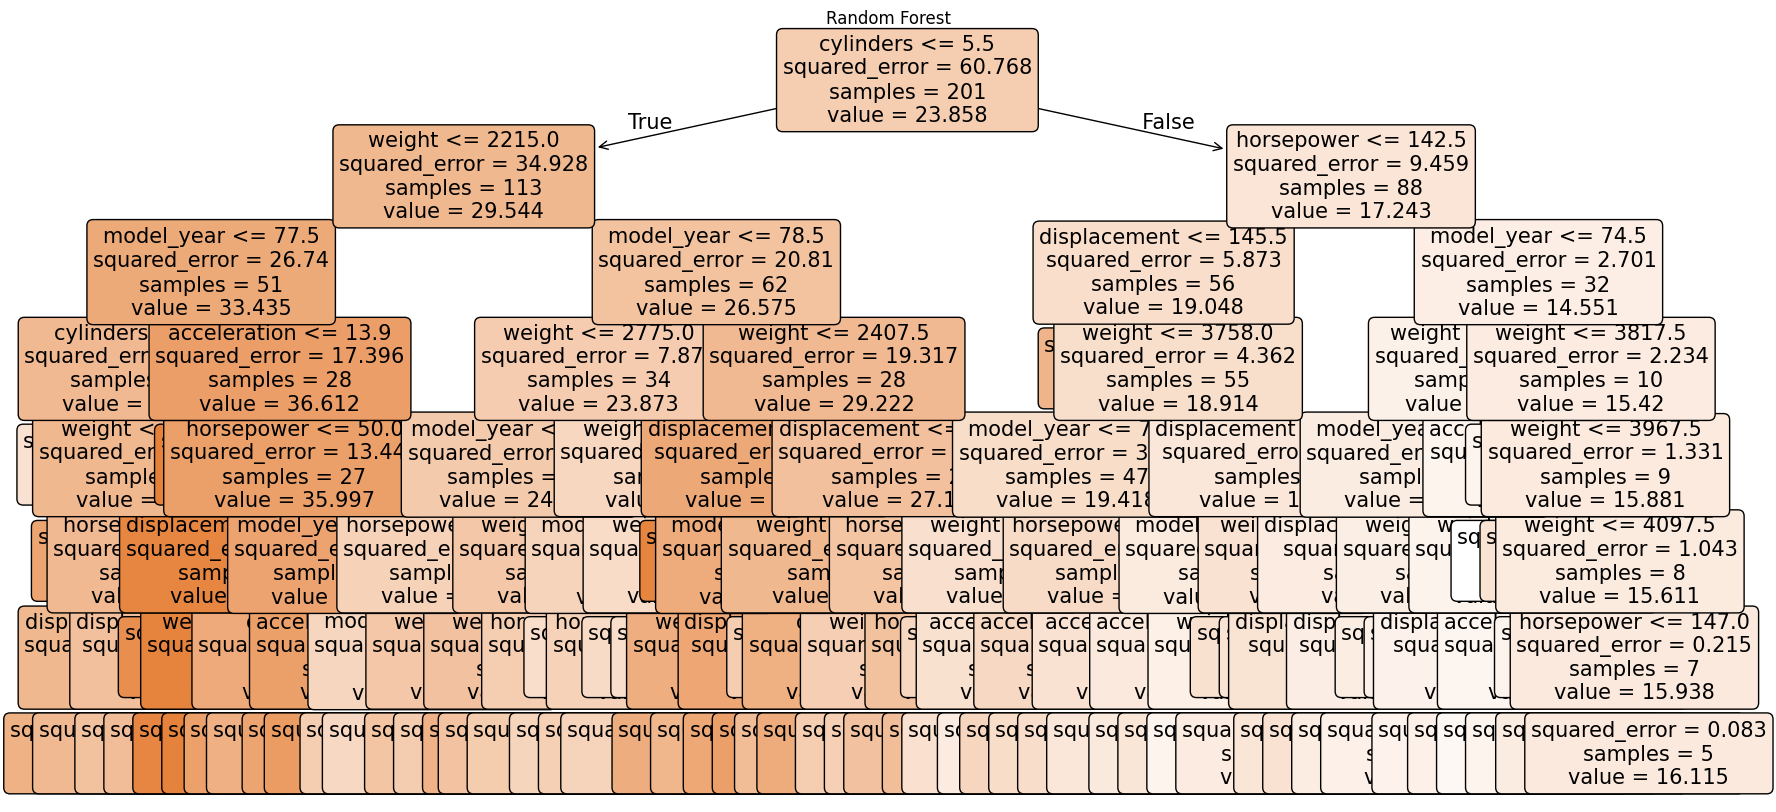

In [172]:
plt.figure(figsize=(20, 10))
plot_tree(rfr.estimators_[0], feature_names=X.columns, filled=True, rounded=True,fontsize=15)
plt.title("Random Forest")
plt.show()

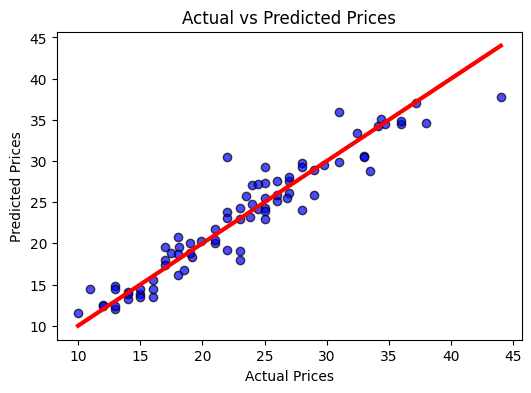

In [173]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, rfr.predict(X_test), color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=3)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

**Summery**

In [174]:
print('Linear Regression : ')
model1 = LinearRegression()
model1.fit(X_train, y_train)
print('Score : ', model1.score(X_test, y_test))

print('Decision Tree Regression : ')
model2 = DecisionTreeRegressor(max_depth=10, random_state=42)
model2.fit(X_train, y_train)
print('Score : ', model2.score(X_test, y_test))

print('Random Forest Regression : ')
model3 = RandomForestRegressor(max_depth = 7, random_state = 63)
model3.fit(X_train, y_train)
print('Score : ', model3.score(X_test, y_test))


Linear Regression : 
Score :  0.8470082090488502
Decision Tree Regression : 
Score :  0.8237236741067544
Random Forest Regression : 


c:\Users\Ratne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Score :  0.9150903396423788


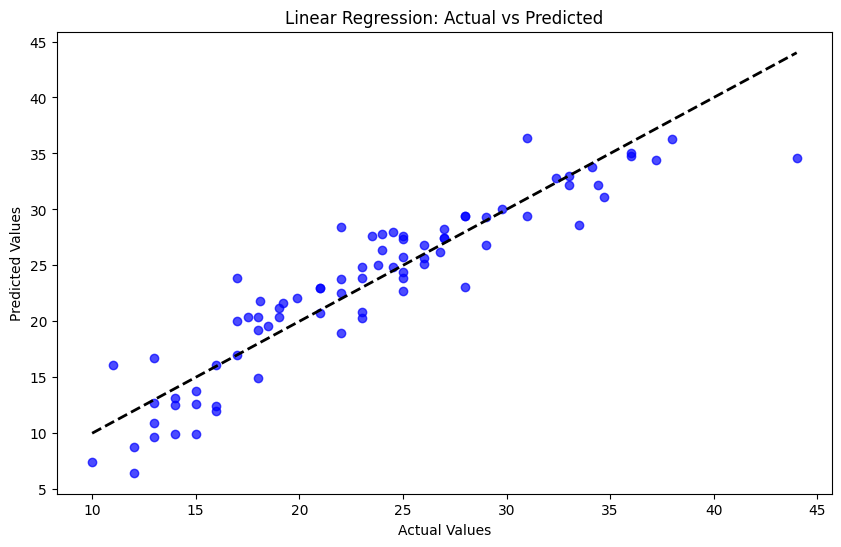

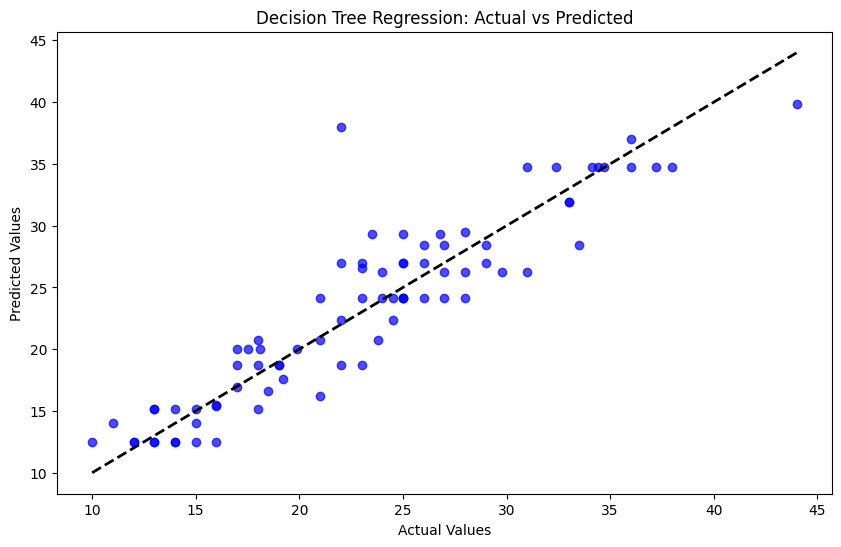

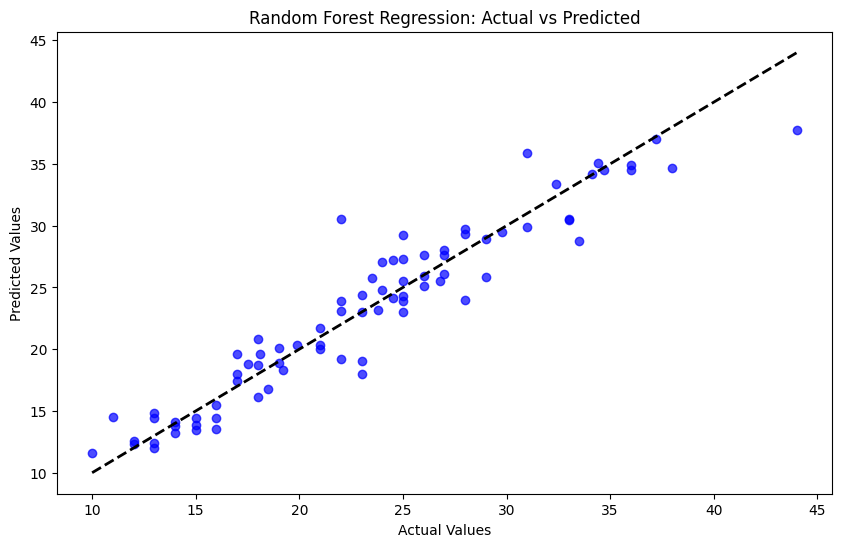

In [175]:
def plot_actual_vs_predicted(y_test, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color='b')  # Scatter plot
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.show()

plot_actual_vs_predicted(y_test, linear_model.predict(X_test), 'Linear Regression: Actual vs Predicted')
plot_actual_vs_predicted(y_test, dtr_model.predict(X_test), 'Decision Tree Regression: Actual vs Predicted')
plot_actual_vs_predicted(y_test, rfr.predict(X_test), 'Random Forest Regression: Actual vs Predicted')

By using RandomizedSerach CV in dession tree Testing Accuracy increase from 0.74675 to 0.7727

**Hyperparameter tuning**

In [176]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [177]:
param = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

**GridSearchCV**

In [178]:
grid = GridSearchCV(estimator=model3, param_grid=param, cv=5, n_jobs=1)
grid.fit(X_train, y_train)

c:\Users\Ratne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Ratne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Ratne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Ratne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConvers

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=7, random_state=63),
             n_jobs=1,
             param_grid={'bootstrap': [True, False], 'max_depth': [3, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [179]:
grid.score(X_test,y_test)

0.9176677591663618

Initally accuraty of Random forest was 0.8844 after appliying GridSeerachCV it become 0.907

**RandomizedSeach**

In [180]:
random=RandomizedSearchCV(estimator=model3,param_distributions=param,n_jobs=1)
random.fit(X_train,y_train,)

c:\Users\Ratne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Ratne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Ratne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Ratne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConvers

RandomizedSearchCV(estimator=RandomForestRegressor(max_depth=7,
                                                   random_state=63),
                   n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 5, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]})

In [181]:
random.score(X_test,y_test)

0.9156592202153416

Further

In [ ]:
#We'll start by testing a variety of algorithms using scikit-learns's gridsearch method for model optimization.
#Our models will include both parametric (e.g. SVM) and non-parametric (e.g. KNN) and linear (e.g. Logistic Regression) and nonlinear modles (e.g. Random Forest Classifier).
# Define parameters for optimization using dictionaries {parameter name: parameter list}

SVM_params = {'C':[0.001, 0.1, 10, 100], 'kernel':['rbf' ,'linear', 'poly', 'sigmoid']}
LR_params = {'C':[0.001, 0.1, 1, 10, 100]}
LDA_params = {'n_components':[None, 1,2,3], 'solver':['svd'], 'shrinkage':[None]}
KNN_params = {'n_neighbors':[1,5,10,20, 50], 'p':[2], 'metric':['minkowski']}
RF_params = {'n_estimators':[10,50,100]}
DTC_params = {'criterion':['entropy', 'gini'], 'max_depth':[10, 50, 100]}
# Append list of models with parameter dictionaries

models_opt = []

models_opt.append(('LR', LogisticRegression(), LR_params))
models_opt.append(('LDA', LinearDiscriminantAnalysis(), LDA_params))
models_opt.append(('KNN', KNeighborsClassifier(),KNN_params))
models_opt.append(('DTC', DecisionTreeClassifier(), DTC_params))
models_opt.append(('RFC', RandomForestClassifier(), RF_params))
models_opt.append(('SVM', SVC(), SVM_params))
results = []
names = []

In [ ]:
def estimator_function(parameter_dictionary, scoring = 'accuracy'):
    
    
    for name, model, params in models_opt:
    
        kfold = KFold(len(X_train_norm), n_folds=5, random_state=2, shuffle=True)

        model_grid = GridSearchCV(model, params)

        cv_results = cross_val_score(model_grid, X_train_norm, y_train, cv = kfold, scoring=scoring)

        results.append(cv_results)

        names.append(name)

        msg = "Cross Validation Accuracy %s: Accarcy: %f SD: %f" % (name, cv_results.mean(), cv_results.std())

        print(msg)